# **Project Task 2 - Advanced Classifiers and Evaluation**

## **Data Preparation**

In [ ]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

from collections import defaultdict
from scipy.stats.stats import pearsonr

In [ ]:
df = pd.read_csv('AirQualityUCI.csv', sep=';',decimal=",") 

In [ ]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


In [ ]:
df.tail()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9470,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.dtypes

Date              object
Time              object
CO(GT)           float64
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
Unnamed: 15      float64
Unnamed: 16      float64
dtype: object

In [ ]:
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,0.0,0.0
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604,NaN,NaN
std,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670,NaN,NaN
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,NaN,NaN
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300,NaN,NaN
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800,NaN,NaN
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200,NaN,NaN
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000,NaN,NaN


### Drop Columns Unnamed

First of all we saw that there are 2 columns that contain only NaN values, so we dropped out that columns.

The columns are labeled as Unnamed: 15 and Unnamed: 16

In [ ]:
df = df.drop(["Unnamed: 15","Unnamed: 16"], axis=1)

In [ ]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


### Drop column NMHC(GT)

In this column there are too much -200 values (missing values) so also if we replace with mean of the feature is too much dependent from this missing values.

In [ ]:
df = df.drop(["NMHC(GT)"], axis=1)

### NaN Values

Drop columns with NaN, the last 2, Unnamed:15 and Unnamed:16
Drop rows with NaN , there only 1% circa.


In [ ]:
df.isnull().any()

Date             True
Time             True
CO(GT)           True
PT08.S1(CO)      True
C6H6(GT)         True
PT08.S2(NMHC)    True
NOx(GT)          True
PT08.S3(NOx)     True
NO2(GT)          True
PT08.S4(NO2)     True
PT08.S5(O3)      True
T                True
RH               True
AH               True
dtype: bool

In [ ]:
df.isnull().sum()

Date             114
Time             114
CO(GT)           114
PT08.S1(CO)      114
C6H6(GT)         114
PT08.S2(NMHC)    114
NOx(GT)          114
PT08.S3(NOx)     114
NO2(GT)          114
PT08.S4(NO2)     114
PT08.S5(O3)      114
T                114
RH               114
AH               114
dtype: int64

In [ ]:
df.shape

(9471, 14)

In [ ]:
df

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df= df.dropna()

In [ ]:
df.shape

(9357, 14)

In [ ]:
df

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,04/04/2005,10.00.00,3.1,1314.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,04/04/2005,11.00.00,2.4,1163.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,04/04/2005,12.00.00,2.4,1142.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,04/04/2005,13.00.00,2.1,1003.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139


After the drop of NaN values in rows we have passed from 9471 rows to 9357 rows.


In [ ]:
df.dtypes

Date              object
Time              object
CO(GT)           float64
PT08.S1(CO)      float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
dtype: object

### Missing values with "-200" value

In [ ]:
df.isin([-200.0]).any()

Date             False
Time             False
CO(GT)            True
PT08.S1(CO)       True
C6H6(GT)          True
PT08.S2(NMHC)     True
NOx(GT)           True
PT08.S3(NOx)      True
NO2(GT)           True
PT08.S4(NO2)      True
PT08.S5(O3)       True
T                 True
RH                True
AH                True
dtype: bool

We know if there is a value with -200 is a missing value by the discription of the dataset, so, we want replace this values with the mean of the each column

In [ ]:
df1=df.replace(-200.0, np.nan)

In [ ]:
df1.isin([-200]).any()

Date             False
Time             False
CO(GT)           False
PT08.S1(CO)      False
C6H6(GT)         False
PT08.S2(NMHC)    False
NOx(GT)          False
PT08.S3(NOx)     False
NO2(GT)          False
PT08.S4(NO2)     False
PT08.S5(O3)      False
T                False
RH               False
AH               False
dtype: bool

In [ ]:
df1.isnull().any()

Date             False
Time             False
CO(GT)            True
PT08.S1(CO)       True
C6H6(GT)          True
PT08.S2(NMHC)     True
NOx(GT)           True
PT08.S3(NOx)      True
NO2(GT)           True
PT08.S4(NO2)      True
PT08.S5(O3)       True
T                 True
RH                True
AH                True
dtype: bool

In [ ]:
dataframe= df1.fillna(df1.mean())

In [ ]:
dataframe.isnull().any()

Date             False
Time             False
CO(GT)           False
PT08.S1(CO)      False
C6H6(GT)         False
PT08.S2(NMHC)    False
NOx(GT)          False
PT08.S3(NOx)     False
NO2(GT)          False
PT08.S4(NO2)     False
PT08.S5(O3)      False
T                False
RH               False
AH               False
dtype: bool

In [ ]:
dataframe

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,04/04/2005,10.00.00,3.1,1314.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,04/04/2005,11.00.00,2.4,1163.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,04/04/2005,12.00.00,2.4,1142.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,04/04/2005,13.00.00,2.1,1003.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139


Now our dataset is called dataframe, we dropped out NaN columns and NMHC(GT) column, we dropped NaN values and we replaced the -200 missing values with the mean of the column.

### Deal with Data and Time

In this section we are going to deal with Date and Time format

#### Date

The problem is that i need the format year - month - day to use datetime function, so i have to switch month with day 

In [ ]:
dataframe['Date']=pd.to_datetime(dataframe.Date, dayfirst=True)

In [ ]:
dataframe['Weekday']=dataframe.Date.dt.weekday

In [ ]:
dataframe['Month']=dataframe.Date.dt.month

In [ ]:
dataframe.dtypes


Date             datetime64[ns]
Time                     object
CO(GT)                  float64
PT08.S1(CO)             float64
C6H6(GT)                float64
PT08.S2(NMHC)           float64
NOx(GT)                 float64
PT08.S3(NOx)            float64
NO2(GT)                 float64
PT08.S4(NO2)            float64
PT08.S5(O3)             float64
T                       float64
RH                      float64
AH                      float64
Weekday                   int64
Month                     int64
dtype: object

In [ ]:
dataframe

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Weekday,Month
0,2004-03-10,18.00.00,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,2,3
1,2004-03-10,19.00.00,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,2,3
2,2004-03-10,20.00.00,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,2,3
3,2004-03-10,21.00.00,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,2,3
4,2004-03-10,22.00.00,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,10.00.00,3.1,1314.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568,0,4
9353,2005-04-04,11.00.00,2.4,1163.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119,0,4
9354,2005-04-04,12.00.00,2.4,1142.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406,0,4
9355,2005-04-04,13.00.00,2.1,1003.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139,0,4


Now the Data Format it's ok and also i create a new feature Weekday with 0=monday and ..... and 6=Sunday.

#### Time

From Time feature i figure out only the hour and assign it to new feature Hour

In [ ]:
dataframe['Hour'] = pd.to_datetime(dataframe['Time'],format= '%H.%M.%S').dt.hour
type(dataframe['Time'][0])

str

In [ ]:
dataframe.dtypes

Date             datetime64[ns]
Time                     object
CO(GT)                  float64
PT08.S1(CO)             float64
C6H6(GT)                float64
PT08.S2(NMHC)           float64
NOx(GT)                 float64
PT08.S3(NOx)            float64
NO2(GT)                 float64
PT08.S4(NO2)            float64
PT08.S5(O3)             float64
T                       float64
RH                      float64
AH                      float64
Weekday                   int64
Month                     int64
Hour                      int64
dtype: object

In [ ]:
dataframe

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Weekday,Month,Hour
0,2004-03-10,18.00.00,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,2,3,18
1,2004-03-10,19.00.00,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,2,3,19
2,2004-03-10,20.00.00,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,2,3,20
3,2004-03-10,21.00.00,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,2,3,21
4,2004-03-10,22.00.00,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,2,3,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,10.00.00,3.1,1314.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568,0,4,10
9353,2005-04-04,11.00.00,2.4,1163.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119,0,4,11
9354,2005-04-04,12.00.00,2.4,1142.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406,0,4,12
9355,2005-04-04,13.00.00,2.1,1003.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139,0,4,13


### New features

At this point we want implement some new features, like 'is night' , 'is evening' , 'officheHour' and 'is weekend' .
Aftet that for each variable we transform from boolean to int 0 and 1 .
1 == True
0 == False

In [ ]:
# dataframe['is Evening'] = (dataframe['Hour'] >= 18) 

In [ ]:
# dataframe['is Evening'] = dataframe['is Evening'].astype(int)

In [ ]:
# dataframe['is Night'] = ( (dataframe['Hour'] >= 18) | (dataframe['Hour'] <6) )

In [ ]:
# dataframe['is Night'] = dataframe['is Night'].astype(int)

In [ ]:
# dataframe['OfficeHour'] = ( (dataframe['Hour'] >= 9) & (dataframe['Hour'] <=18 ) )

In [ ]:
# dataframe['OfficeHour'] = dataframe['OfficeHour'].astype(int)

In [ ]:
dataframe['Weekend'] = ( (dataframe['Weekday'] == 5) | (dataframe['Weekday'] == 6) )

In [ ]:
dataframe['Weekend'] = dataframe['Weekend'].astype(int)

In [ ]:
dataframe

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Weekday,Month,Hour,Weekend
0,2004-03-10,18.00.00,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,2,3,18,0
1,2004-03-10,19.00.00,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,2,3,19,0
2,2004-03-10,20.00.00,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,2,3,20,0
3,2004-03-10,21.00.00,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,2,3,21,0
4,2004-03-10,22.00.00,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,2,3,22,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,10.00.00,3.1,1314.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568,0,4,10,0
9353,2005-04-04,11.00.00,2.4,1163.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119,0,4,11,0
9354,2005-04-04,12.00.00,2.4,1142.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406,0,4,12,0
9355,2005-04-04,13.00.00,2.1,1003.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139,0,4,13,0


In [ ]:
dataframe.dtypes

Date             datetime64[ns]
Time                     object
CO(GT)                  float64
PT08.S1(CO)             float64
C6H6(GT)                float64
PT08.S2(NMHC)           float64
NOx(GT)                 float64
PT08.S3(NOx)            float64
NO2(GT)                 float64
PT08.S4(NO2)            float64
PT08.S5(O3)             float64
T                       float64
RH                      float64
AH                      float64
Weekday                   int64
Month                     int64
Hour                      int64
Weekend                   int64
dtype: object

In [ ]:
dataframe['Weekend'].value_counts()

0    6669
1    2688
Name: Weekend, dtype: int64

Lavoreremo su un dataset che contiene solo i gas, la T, Rh e la varibiale dipendente Weekend

In [ ]:
df2 = dataframe[["CO(GT)", "PT08.S1(CO)", "C6H6(GT)",	"PT08.S2(NMHC)", "NOx(GT)",	"PT08.S3(NOx)",	"NO2(GT)",	"PT08.S4(NO2)",	"PT08.S5(O3)","T"	,"RH"	,"Weekend"]]

In [ ]:
df2.head()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,Weekend
0,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0
1,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0
2,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0
3,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0
4,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0


# **2.1 + 2.2 - Advanced Classifiers + Evaluatation**


Using the dataset for classification prepared for Task 1 build several advanced classifiers able to predict room occupancy from the available variables. In particular, you are required to use SVM (linear and non-linear), NN (Single and Multilayer Perceptron), DNN (design at least two different architectures), Ensemble Classifier (RandomForest, AdaBoost and a Bagging technique in which you can select a base classifier of your choice with a justification).

### **SVM**

Support Vector Machines are a supervised learning model that represents the decision boundary using a subset of the training examples, known as the support vectors.

SVMs are one of the powerful machine learning algorithms for classification, regression and outlier detection purposes. An SVM classifier builds a model that assigns new data points to one of the given categories. Thus, it can be viewed as a non-probabilistic binary linear classifier.

Per quanto riguarda la SVM, è stata implementata applicando al dataset iniziale lo StandardScaler sugli attributi numerici.

Per la ricerca dei migliori parametri per l’implementazione del Support Vector Classifier è stata utilizzata la GridSearchCV. Per quanto riguarda la SVM, è stata implementata applicando al dataset iniziale lo StandardScaler sugli attributi numerici.

Lo scoring sulle varie combinazioni dei parametri è stato fatto tenendo conto dell’accuracy misurata su un set di validazione di ampiezza 5, inoltre, voglio differenziare i vari kernel.

Useremo le Kernel function di :
- Radial basis funciton (rbf)
- Linear
- Polynomial (poly)
- Sigmoid


Partiamo da rbf perchè è quella di default

Prima però devo standardizzare le variabili numeriche del dataset

In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score 

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import roc_curve, auc, roc_auc_score


In [ ]:
scaler = StandardScaler()

Before standardize i need to drop out the depenedet variable

In [ ]:
scaler.fit(df2.drop('Weekend',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
scaled_features = scaler.transform(df2.drop('Weekend',axis=1))

In [ ]:
df2_feat = pd.DataFrame(scaled_features,columns=df2.columns[:-1])
df2_feat.head()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH
0,0.339856,1.222702,0.248813,0.408519,-0.418252,0.875962,-0.002078,0.694669,0.627494,-0.544962,-0.019689
1,-0.116071,0.903123,-0.093547,0.060588,-0.743974,1.344717,-0.480235,0.302742,-0.130331,-0.579615,-0.090386
2,0.035905,1.420088,-0.148325,-0.000586,-0.599209,1.209652,0.020692,0.290955,0.130812,-0.741330,0.280772
3,0.035905,1.297897,-0.120936,0.033824,-0.387231,1.018972,0.202847,0.376413,0.461080,-0.845290,0.634256
4,-0.420023,0.809130,-0.490684,-0.394398,-0.599209,1.467865,0.066230,0.099412,0.222979,-0.822188,0.610691


Now i recompute the split on scaled features and without dependent variable:


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df2['Weekend'],test_size=0.20)

Metti **PCA** qua che mi serve per dopo:

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_train)

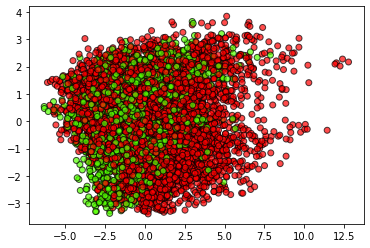

In [ ]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

Per i vari algoritmi di SVM li confronteremo usando i seguenti valori di C (che rappresenta il costo per l'errata classificazione) :
- 1
- 10
- 100
- 1000

I parametri usati per gamma invece li vediamo dopo, ho preso un set standard e usato la GridSearchCV per trovare i migliori, approfondito dopo

#### **SVM default parameters**

Default hyperparameter means C=1.0, kernel=rbf and gamma=auto among other parameters

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svc=SVC() # instantiate classifier with default hyperparameters
svc.fit(X_train,y_train) # fit classifier to training set
y_pred=svc.predict(X_test) # make predictions on test set

print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.7415


The accuracy for default hyperparametrs SVM is 0.7644

visto che il default è il rbf iniziamo da quest'ultimo ad esplorare qualche valore di C:

#### **Run SVM with rbf kernel and C=10.0**
If we have a lot of outliers in our dataset (non lo sappiamo ancora perchè viene dopo) it is good idea use an highr C, also C0100, but now test with C=10. 

In [ ]:
svc=SVC(C=10.0) 
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)

print('Model accuracy score with rbf kernel and C=10.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=10.0 : 0.7804


Accuracy è aumentata di qualche punto quindi bene.

#### **Run SVM with rbf kernel and C=100.0**

So, we should increase the value of C as higher C means fewer outliers. So, I will run SVM with kernel=rbf and C=100.0.

In [ ]:
svc=SVC(C=100.0) 
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)

print('Model accuracy score with rbf kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=100.0 : 0.8168


Ancora meglio con C=100, il meglio fino a ora in termini di accuracy.

#### **Run SVM with rbf kernel and C=1000.0**

In [ ]:
svc=SVC(C=1000.0) 
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)

print('Model accuracy score with rbf kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=1000.0 : 0.8259


In termini di accurancy il migliore SVM con rbf è quello con C=1000

### **Linear SVM**

In [ ]:
from sklearn.svm import LinearSVC

#### **SVM Linear with C=1.0**

In [ ]:
linear_svc=SVC(kernel='linear', C=1.0,random_state=10) 
linear_svc.fit(X_train,y_train)
y_pred_test=linear_svc.predict(X_test)

print('Model accuracy score with linear kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))


Model accuracy score with linear kernel and C=1.0 : 0.6928


In [ ]:
print('F1-score %s' % f1_score(y_test, y_pred_test, average=None))
print(classification_report(y_test, y_pred_test))

F1-score [0.81855475 0.        ]
              precision    recall  f1-score   support

           0       0.69      1.00      0.82      1297
           1       0.00      0.00      0.00       575

    accuracy                           0.69      1872
   macro avg       0.35      0.50      0.41      1872
weighted avg       0.48      0.69      0.57      1872



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM linear con C=1.0 ha accuracy di 0.71 e F1-score=0.8278

#### **SVM Linear C=10**

In [ ]:
clf = LinearSVC(C=10.0, random_state=10)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.7142094017094017
F1-score [0.82124958 0.28761651]
              precision    recall  f1-score   support

           0       0.72      0.95      0.82      1297
           1       0.61      0.19      0.29       575

    accuracy                           0.71      1872
   macro avg       0.67      0.57      0.55      1872
weighted avg       0.69      0.71      0.66      1872



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Migliorata sia Accuracy che F1-Score

#### **SVM Linear C=100**

In [ ]:
clf = LinearSVC(C=100.0, random_state=10)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.6308760683760684
F1-score [0.72170761 0.4520222 ]
              precision    recall  f1-score   support

           0       0.76      0.69      0.72      1297
           1       0.42      0.50      0.45       575

    accuracy                           0.63      1872
   macro avg       0.59      0.59      0.59      1872
weighted avg       0.65      0.63      0.64      1872



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Questo è andato peggio

#### **SVM Linear C=1000**

In [ ]:
clf = LinearSVC(C=1000.0, random_state=10)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.5774572649572649
F1-score [0.66917608 0.41537324]
              precision    recall  f1-score   support

           0       0.73      0.62      0.67      1297
           1       0.36      0.49      0.42       575

    accuracy                           0.58      1872
   macro avg       0.55      0.55      0.54      1872
weighted avg       0.62      0.58      0.59      1872



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Questo ancora peggio

**Il miglior SVM Linear è quello con C=10**

#### **Decision function su SVM Lineare**

In [ ]:
decision_function = clf.decision_function(X_train)
support_vector_indices = np.where((2 * y_train - 1) * decision_function <= 1)[0]
support_vectors = X_train[support_vector_indices]

In [ ]:
support_vectors_pca = pca.transform(support_vectors)

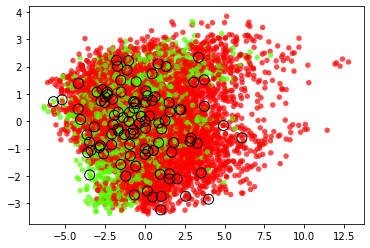

In [ ]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='none', alpha=0.7, s=30)
plt.scatter(support_vectors_pca[:100, 0], support_vectors_pca[:100, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k')
plt.show()

After SVM linear operations we want to compare the train-set and test-set accuracy.
Now, we will compare the train-set and test-set accuracy to check for overfitting.

In [ ]:
print('Training set score: {:.4f}'.format(linear_svc.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(linear_svc.score(X_test, y_test)))

Training set score: 0.7177
Test set score: 0.6928


The training-set accuracy score is 0.7144 while the test-set accuracy to be 0.7062. These two values are quite comparable. 
So, if it reasonable think that there is no question of overfitting. 

Infatti le tecniche di random Undersampling non andavano benissimo in Task1

### **Effort of C**

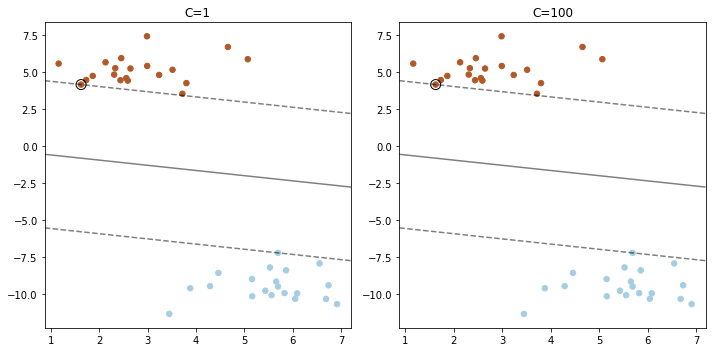

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.svm import LinearSVC

X, y = make_blobs(n_samples=40, centers=2, random_state=10)

plt.figure(figsize=(10, 5))
for i, C in enumerate([1, 100]):
    # "hinge" is the standard SVM loss
    clf = LinearSVC(C=C, loss="hinge", random_state=42).fit(X, y)
    # obtain the support vectors through the decision function
    decision_function = clf.decision_function(X)
    # we can also calculate the decision function manually
    # decision_function = np.dot(X, clf.coef_[0]) + clf.intercept_[0]
    support_vector_indices = np.where((2 * y - 1) * decision_function <= 1)[0]
    support_vectors = X[support_vector_indices]

    plt.subplot(1, 2, i + 1)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                         np.linspace(ylim[0], ylim[1], 50))
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
                linestyles=['--', '-', '--'])
    plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k')
    plt.title("C=" + str(C))
plt.tight_layout()
plt.show()

### **Poly SVM**

#### **Poly SVM C=1.0** 

In [ ]:
clf = SVC(C=1, kernel='poly', random_state=10)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.7216880341880342
F1-score [0.83166397 0.1972265 ]
              precision    recall  f1-score   support

           0       0.72      0.99      0.83      1297
           1       0.86      0.11      0.20       575

    accuracy                           0.72      1872
   macro avg       0.79      0.55      0.51      1872
weighted avg       0.76      0.72      0.64      1872



#### **Poly SVM C=10** 

In [ ]:
clf = SVC(C=10, kernel='poly', random_state=10)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.7430555555555556
F1-score [0.84067572 0.33655172]
              precision    recall  f1-score   support

           0       0.74      0.98      0.84      1297
           1       0.81      0.21      0.34       575

    accuracy                           0.74      1872
   macro avg       0.78      0.60      0.59      1872
weighted avg       0.76      0.74      0.69      1872



#### **Poly SVM C=100** 

In [ ]:
clf = SVC(C=100, kernel='poly', random_state=10)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.7596153846153846
F1-score [0.84641638 0.44717445]
              precision    recall  f1-score   support

           0       0.76      0.96      0.85      1297
           1       0.76      0.32      0.45       575

    accuracy                           0.76      1872
   macro avg       0.76      0.64      0.65      1872
weighted avg       0.76      0.76      0.72      1872



#### **Poly SVM C=1000** 

In [ ]:
clf = SVC(C=1000, kernel='poly', random_state=10)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.7729700854700855
F1-score [0.85299204 0.5017585 ]
              precision    recall  f1-score   support

           0       0.77      0.95      0.85      1297
           1       0.77      0.37      0.50       575

    accuracy                           0.77      1872
   macro avg       0.77      0.66      0.68      1872
weighted avg       0.77      0.77      0.75      1872



Il miglior SVM Poly è quello con C=1000

### **Sigmoid SVM**

#### **Sigmoid SVM C=1.0** 

In [ ]:
clf = SVC(C=1, kernel='sigmoid', random_state=10)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.6089743589743589
F1-score [0.72727273 0.30943396]
              precision    recall  f1-score   support

           0       0.70      0.75      0.73      1297
           1       0.34      0.29      0.31       575

    accuracy                           0.61      1872
   macro avg       0.52      0.52      0.52      1872
weighted avg       0.59      0.61      0.60      1872



#### **Sigmoid SVM C=10** 

In [ ]:
clf = SVC(C=10, kernel='sigmoid', random_state=10)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.6073717948717948
F1-score [0.72543892 0.31115276]
              precision    recall  f1-score   support

           0       0.70      0.75      0.73      1297
           1       0.34      0.29      0.31       575

    accuracy                           0.61      1872
   macro avg       0.52      0.52      0.52      1872
weighted avg       0.59      0.61      0.60      1872



#### **Sigmoid SVM C=100** 

In [ ]:
clf = SVC(C=100, kernel='sigmoid', random_state=10)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.6079059829059829
F1-score [0.72571001 0.31273408]
              precision    recall  f1-score   support

           0       0.70      0.75      0.73      1297
           1       0.34      0.29      0.31       575

    accuracy                           0.61      1872
   macro avg       0.52      0.52      0.52      1872
weighted avg       0.59      0.61      0.60      1872



#### **Sigmoid SVM C=1000** 

In [ ]:
clf = SVC(C=1000, kernel='sigmoid', random_state=10)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.6079059829059829
F1-score [0.72571001 0.31273408]
              precision    recall  f1-score   support

           0       0.70      0.75      0.73      1297
           1       0.34      0.29      0.31       575

    accuracy                           0.61      1872
   macro avg       0.52      0.52      0.52      1872
weighted avg       0.59      0.61      0.60      1872



Male tutti i SVM Sigmoid, prendo quello con C=1.0 perchè ha il valore di F1 + alto anche se di veramente poco

### **Hyperparameter Optimization with GridSearchCV**

**QUESTO CI METTE 3 ORE COME TEMPO DI ESECUZIONE**

In [ ]:
# import GridSearchCV
from sklearn.model_selection import GridSearchCV
# import SVC classifier
from sklearn.svm import SVC


# instantiate classifier with default hyperparameters with kernel=rbf, C=1.0 and gamma=auto
svc=SVC() 

# declare parameters for hyperparameter tuning
parameters = [ {'C':[1, 10, 100, 1000], 'kernel':['linear']},
               {'C':[1, 10, 100, 1000], 'kernel':['rbf'], 'gamma':[0.1, 0.2, 0.3, 0.4, 0.5]},
               {'C':[1, 10, 100, 1000], 'kernel':['poly'], 'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03,0.04,0.05]}, 
               {'C':[1, 10, 100, 1000], 'kernel':['sigmoid'], 'gamma':[0.01,0.02,0.03,0.04,0.05]} 
              ]

grid_search = GridSearchCV(estimator = svc,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000],
                          'gamma': [0.1, 0.2, 0.3, 0.4, 0.5],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'degree': [2, 3, 4],
                          'gamma': [0.01, 0.02, 0.03, 0.04, 0.05],
                          'kernel': ['poly']},
                         {'C': [1, 10, 100, 1000],
                          'gamma': [0.01, 0.02, 0.03,

let's examine the best model now:

In [ ]:
# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

GridSearch CV best score : 0.8354


Parameters that give the best results : 

 {'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}


Estimator that was chosen by the search : 

 SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


Da questo possiamo vedere che il miglior score con GridSearch è di 0.8354 e ha come paraemtri :
- c = 100
- gamma = 0.1
- kernel = rbf

In [ ]:
# calculate GridSearch CV score on test set

print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(X_test, y_test)))

GridSearch CV score on test set: 0.8264


SCRIVI CONCLUSIONI SVM